<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression for a binary classification

#### 1. Training Data

- load the training data file ('data.txt')
- each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$
- $x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

#### 2. Logistic regression

- $\hat{h} = \sigma(z)$ 
- $z = \theta_0 + \theta_1 x + \theta_2 y$, where $\theta_0, \theta_1, \theta_2 \in \mathbb{R}$
- $\sigma(z) = \frac{1}{1 + \exp(-z)}$
- $\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$

#### 3. Objective Function

- $J(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)}))  )$

#### 4. Gradient Descent

- $\theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)})$
- $\theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) x^{(i)}$
- $\theta_2^{(t+1)} := \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) y^{(i)}$
- you should choose a learning rate $\alpha$ in such a way that the convergence is achieved
- you can use any initial conditions $(\theta_0^{(0)}, \theta_1^{(0)}, \theta_2^{(0)})$
 
#### 5. Training

- find optimal parameters $(\theta_0, \theta_1, \theta_2)$ using the training data

#### 6. Visualize Classifier

- visualize the obtained classifier with varying $x$ and $y$ values that range from the minimum to the maximum of the training data




## Maching Learning Lecture
 ~ 4

https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import csv

train_path = '/content/drive/My Drive/Colab Notebooks/MatrixComputation/data_train.csv'
test_path = '/content/drive/My Drive/Colab Notebooks/MatrixComputation/data_test.csv'

train_data = []
test_data = []

with open(train_path, newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        train_data.append(i[0])
        train_data.append(i[1])
        train_data.append(i[2])
        train_data.append(i[3])
        ct += 1
    num_train = ct

with open(test_path, newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0
    for i in reader:
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        test_data.append(i[0])
        test_data.append(i[1])
        test_data.append(i[2])
        test_data.append(i[3])
        ct += 1
    num_test = ct

train_data = np.reshape(train_data, (num_train, 4))
test_data = np.reshape(test_data, (num_test, 4))

In [0]:
print(f'train_data {train_data.shape}')
print(f'test_data {test_data.shape}')
# print(f'train_data {train_data}')
# print(f'test_data {test_data}')

train_data (300, 4)
test_data (300, 4)


In [0]:
train_data = train_data.astype(np.float) # string to float
test_data = test_data.astype(np.float)
# print(f'train_data {train_data}')
# print(f'test_data {test_data}')

In [0]:
x = train_data[:, 0]
y = train_data[:, 1]
z = train_data[:, 2]
h = train_data[:, 3]
print(f'x.shape {x.shape}')
print(f'y.shape {y.shape}')
print(f'z.shape {z.shape}')
print(f'h.shape {h.shape}')

x.shape (300,)
y.shape (300,)
z.shape (300,)
h.shape (300,)


In [0]:
x_test = test_data[:, 0]
y_test = test_data[:, 1]
z_test = test_data[:, 2]
h_test = test_data[:, 3]
print(f'x_test.shape {x_test.shape}')
print(f'y_test.shape {y_test.shape}')
print(f'z_test.shape {z_test.shape}')
print(f'h_test.shape {h_test.shape}')

x_test.shape (300,)
y_test.shape (300,)
z_test.shape (300,)
h_test.shape (300,)


In [0]:
# linear regression #
# x, y, num, theta0, theta1 -> x, y, z, num, theta0, theta1, theta2, theta3, h
# x = i[0] y = i[1] z = i[2] h = i[3]

In [0]:
def pred(x, y, z, theta0, theta1, theta2, theta3):
  h_hat = theta0 + theta1*x + theta2*y + theta3*z
  return h_hat

In [0]:
def ObjFnc(num, h, h_hat): # L2-norm between h_hat and h
  total = 0
  diff = h - h_hat
  sqr = diff ** 2
  for i in range(num):
    total += sqr[i]
  result = total/(2*num)
  return result

In [0]:
# hyper parameters #
theta0 = 0 # parameter initilization
theta1 = 0
theta2 = 0
theta3 = 0
itr = 3000 # step_size
lr = 1e-6 # learning_rate

cost_list = []
theta0_list = []
theta1_list = []
theta2_list = []
theta3_list = []

In [0]:
for i in range(itr): # gradient descent
  h_hat_prev = pred(x, y, z, theta0, theta1, theta2, theta3)
  # print(h_hat_prev)
  cost_prev = ObjFnc(num_train, h, h_hat_prev)
  cost_list.append(cost_prev)
  theta0_list.append(theta0)
  theta1_list.append(theta1)
  theta2_list.append(theta2)
  theta3_list.append(theta3)

  grad_zero = np.sum(h_hat_prev - h) / num_train
  grad_one = np.sum((h_hat_prev - h)*x) / num_train
  grad_two = np.sum((h_hat_prev - h)*y) / num_train
  grad_three = np.sum((h_hat_prev - h)*z) / num_train

  temp0 = theta0 - lr*grad_zero
  temp1 = theta1 - lr*grad_one
  temp2 = theta2 - lr*grad_two
  temp3 = theta3 - lr*grad_three
  h_hat_next = pred(x, y, z, temp0, temp1, temp2, temp3)
  cost_next = ObjFnc(num_train, h, h_hat_next)

  if(cost_prev < cost_next): # repeat until convergence cost_prev < cost_next
    break
  else:
    theta0 = temp0
    theta1 = temp1
    theta2 = temp2
    theta3 = temp3

final_step = i
print(f'final_step {final_step}')
print(f'final_cost {cost_prev}')
# print(f'cost {cost_list}')
# print(f'theta0 {theta0_list}')
# print(f'theta1 {theta1_list}')

final_step 2999
final_cost 486.58297701235074


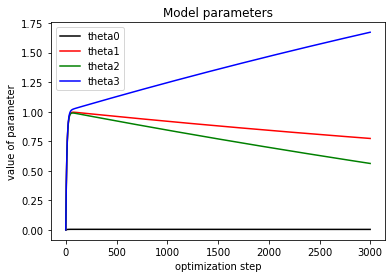

In [0]:
plt.plot(range(final_step+1), theta0_list, c='k')
plt.plot(range(final_step+1), theta1_list, c='r')
plt.plot(range(final_step+1), theta2_list, c='g')
plt.plot(range(final_step+1), theta3_list, c='b')
plt.xlabel('optimization step')
plt.ylabel('value of parameter')
plt.title('Model parameters')
plt.legend(['theta0', 'theta1', 'theta2', 'theta3'])
plt.show()

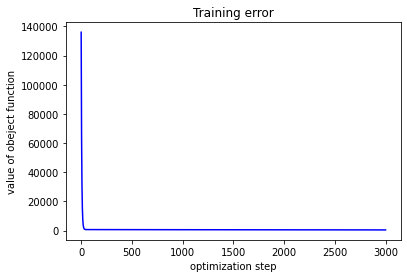

In [0]:
plt.plot(range(final_step+1), cost_list, c='b')
plt.xlabel('optimization step')
plt.ylabel('value of obeject function')
plt.title('Training error')
plt.show()

In [0]:
test_cost_list = []
for i in range(final_step+1): # test error
  temp0 = theta0_list[i]
  temp1 = theta1_list[i]
  temp2 = theta2_list[i]
  temp3 = theta3_list[i]

  h_hat_test = pred(x_test, y_test, z_test, temp0, temp1, temp2, temp3)
  cost = ObjFnc(num_test, h_test, h_hat_test)
  test_cost_list.append(cost)

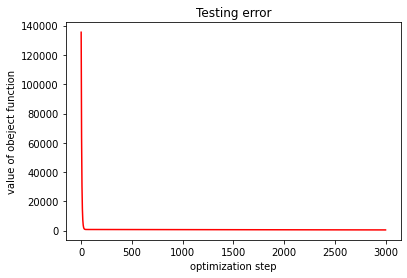

In [0]:
plt.plot(range(final_step+1), test_cost_list, c='r')
plt.xlabel('optimization step')
plt.ylabel('value of obeject function')
plt.title('Testing error')
plt.show()